In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as ss
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import pandas.util.testing as tm

C:\Users\Pavilion\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Adult_Clean.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,Age,Workclass,Final Weight,Education,Years of Education,Marital Status,Occupation,Role in Family,Race,Gender,Capital Gain,Capital Loss,Workhours per Week,Native Country,Income
0,90,Private,77053,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Adm-clerical,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,Middle-School,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
print('This dataframe contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

This dataframe contains 32537 rows and 15 columns


In [4]:
kolom_desc = ['Feature Name', 'Feature Type', 'Null Count', 'Null Percentage', 'Unique Data', 'Unique Data Sample']
list_desc = []
for i in df.columns:
    list_desc.append([i,
                      df[i].dtype,
                      df[i].isna().sum(),
                      round((df[i].isna().sum()/len(df[i]))*100,2),
                      df[i].nunique(),
                      list(df[i].drop_duplicates().sample(2, replace = True).values)
                     ])
df_desc = pd.DataFrame(columns = kolom_desc, data = list_desc)
df_desc

,Feature Name,Feature Type,Null Count,Null Percentage,Unique Data,Unique Data Sample
0,Age,int64,0,0.0,73,"[51, 87]"
1,Workclass,object,0,0.0,4,"[Private, Other]"
2,Final Weight,int64,0,0.0,21648,"[206351, 99491]"
3,Education,object,0,0.0,12,"[Some-college, Masters]"
4,Years of Education,int64,0,0.0,16,"[10, 13]"
5,Marital Status,object,0,0.0,5,"[Divorced, Single]"
6,Occupation,object,0,0.0,14,"[Farming-fishing, Farming-fishing]"
7,Role in Family,object,0,0.0,6,"[Husband, Wife]"
8,Race,object,0,0.0,5,"[Other, White]"
9,Gender,object,0,0.0,2,"[Male, Male]"


In [5]:
df.describe()

,Age,Final Weight,Years of Education,Capital Gain,Capital Loss,Workhours per Week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Exploratory Data Analysis (EDA)

In this phase, I will try explore gain knowledge and insight about the data so I can build model accurate to predict Income in the data.

In [6]:
df['Income'].value_counts()

<=50K    24698
>50K      7839
Name: Income, dtype: int64

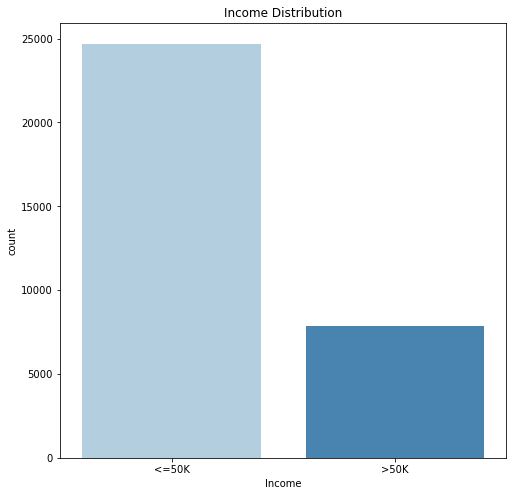

In [7]:
plt.figure(figsize = (8,8))
income = sns.countplot(x = df['Income'], palette = 'Blues')
income.set_title('Income Distribution')

plt.show()

There is a significant discrepancy data between the two income categories. Let's take this in mind.

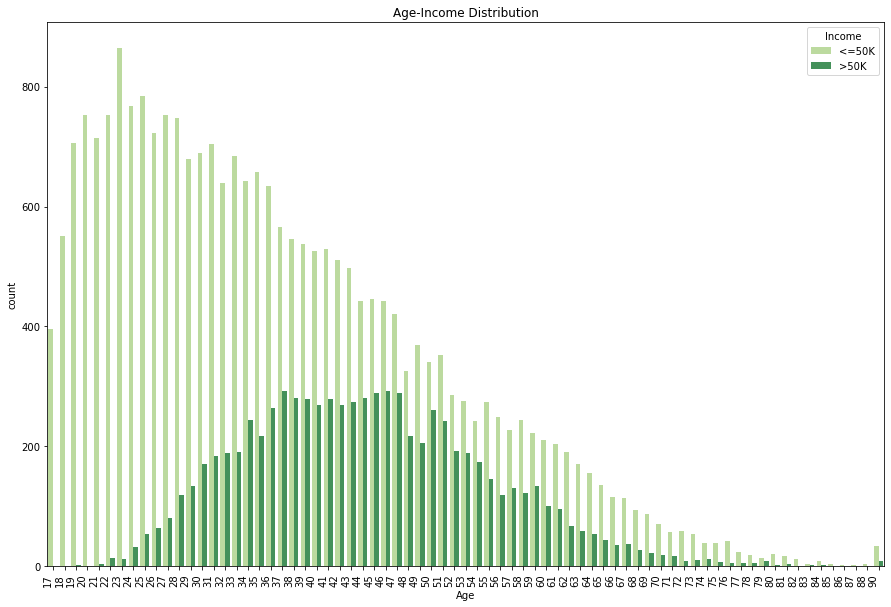

In [8]:
plt.figure(figsize = (15,10))
age_income_distribution = sns.countplot(x = df['Age'], hue = df['Income'], palette = 'YlGn')
age_income_distribution.set_xticklabels(age_income_distribution.get_xticklabels(), 
                                        horizontalalignment='right', rotation=90)
age_income_distribution.set_title('Age-Income Distribution')
plt.legend(title = 'Income', loc='upper right')
plt.show()

From chart above, we can see that most people from productive age (15 - 64) earns about <=50K a year and people who earns >50K a year mostly on the middle of their carreer.

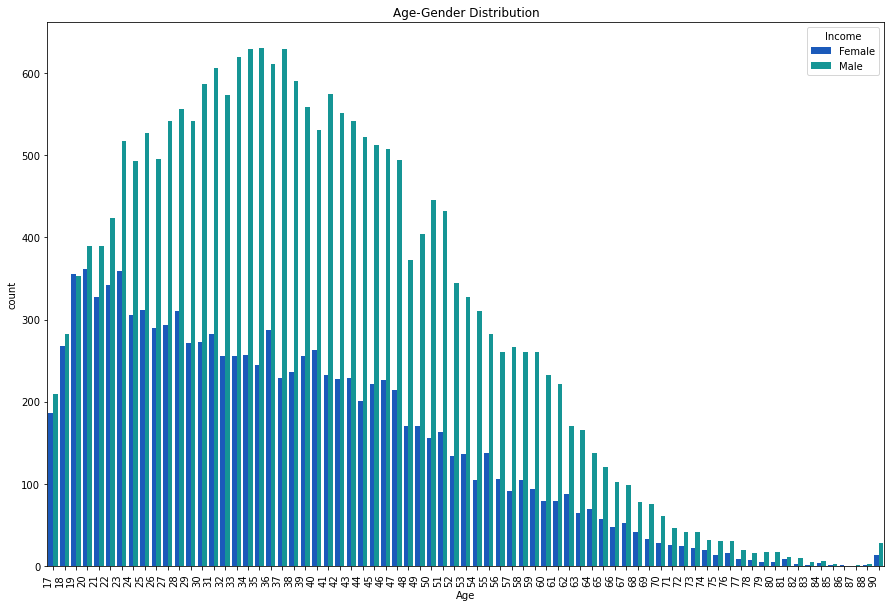

In [9]:
plt.figure(figsize = (15,10))
gender_distribution = sns.countplot(x = df['Age'], hue = df['Gender'], 
                                        palette = 'winter')
gender_distribution.set_xticklabels(gender_distribution.get_xticklabels(), 
                                        horizontalalignment='right', rotation=90)
gender_distribution.set_title('Age-Gender Distribution')

plt.legend(title = 'Income', loc='upper right')
plt.show()

There is an inequality of Gender Data. I guess it happened because when the data is collected people don't really care about with what gender the census participant is. 

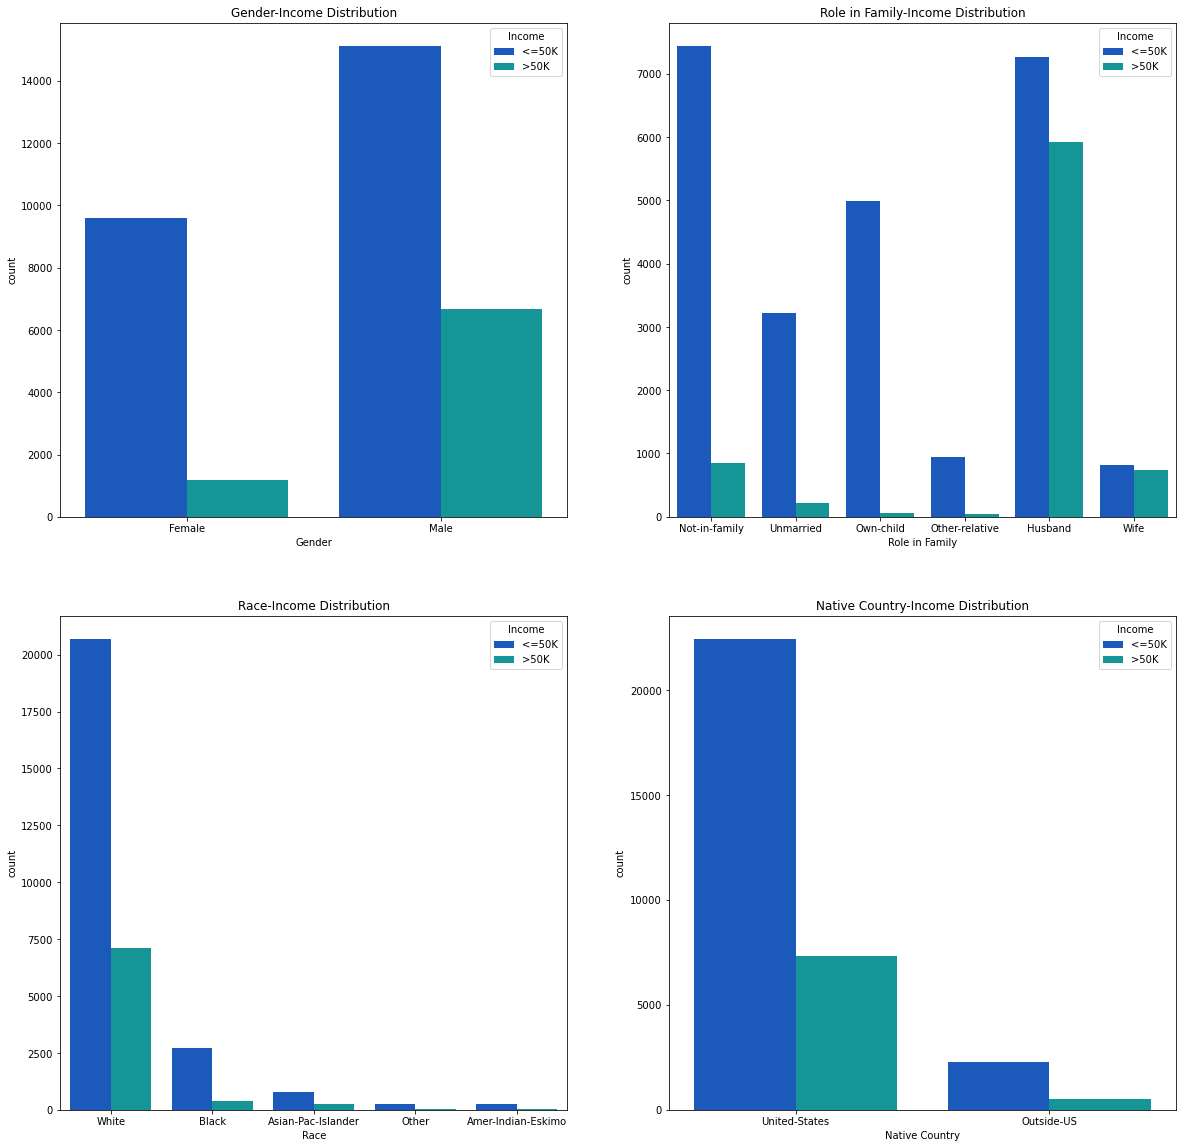

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(20,20))

gender_distribution = sns.countplot(x = df['Gender'], hue = df['Income'], 
                                        palette = 'winter',ax = ax1)
gender_distribution.set_title('Gender-Income Distribution')


fml_role_dist = sns.countplot(x = df['Role in Family'], hue = df['Income'], 
                                        palette = 'winter', ax = ax2)
fml_role_dist.set_title('Role in Family-Income Distribution')


race_distribution = sns.countplot(x = df['Race'], hue = df['Income'], 
                                        palette = 'winter', ax = ax3)
race_distribution.set_title('Race-Income Distribution')


country_dist = sns.countplot(x = df['Native Country'], hue = df['Income'], 
                                        palette = 'winter', ax = ax4)
country_dist.set_title('Native Country-Income Distribution')


plt.legend(title = 'Income', loc='upper right')
plt.show()

As expected, because of uneven distribution of 'Gender' data, most Male earn more than Female. Also there is no particular distribution in 'Role in Family' Data. In 'Race' feature, there is a discrepancy distribution between Race and Native Country feature, one factor contributes the most to this is that this dataset is based on US-Cencus data and US people is mostly white and comes from United-states.

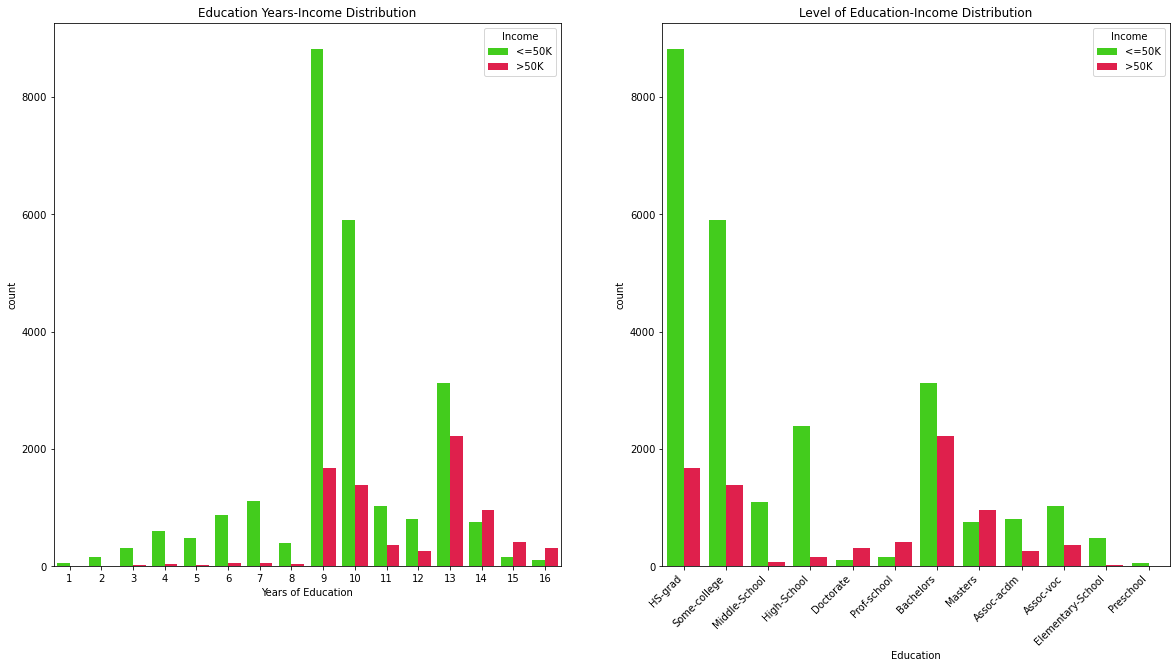

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))

eduyears_dist = sns.countplot(x = df['Years of Education'], hue = df['Income'], 
                                        palette = 'prism', ax = ax1)
eduyears_dist.set_title('Education Years-Income Distribution')


ax2.set_ylabel("") 
edu_dist = sns.countplot(x = df['Education'], hue = df['Income'], 
                                        palette = 'prism', ax = ax2)
edu_dist.set_xticklabels(edu_dist.get_xticklabels(), 
                                        horizontalalignment='right', rotation=45)
edu_dist.set_title('Level of Education-Income Distribution')


plt.legend(title = 'Income', loc='upper right')
plt.show()

From chart above, people with >9 years of education tend to earn more than 50K a year. Also, there is an interesting information here, not all census participant whose earning is more than 50K gained a Bachelor degree. Some 'just' graduated from high school and some also has not been able to complete their college degree can gained earning more than 50K. Let's explore more.

In [12]:
df_more_50k = df.loc[df['Income'] == '>50K']
education_more_50k = df_more_50k['Education'].value_counts()
labels_edu_more_50k = list(education_more_50k.index)
edu_sum_more_50k = list(education_more_50k)

In [13]:
df_less_50k = df.loc[df['Income'] == '<=50K']
education_less_50k = df_less_50k['Education'].value_counts()
labels_edu_less_50k = list(education_less_50k.index)
edu_sum_less_50k = list(education_less_50k)

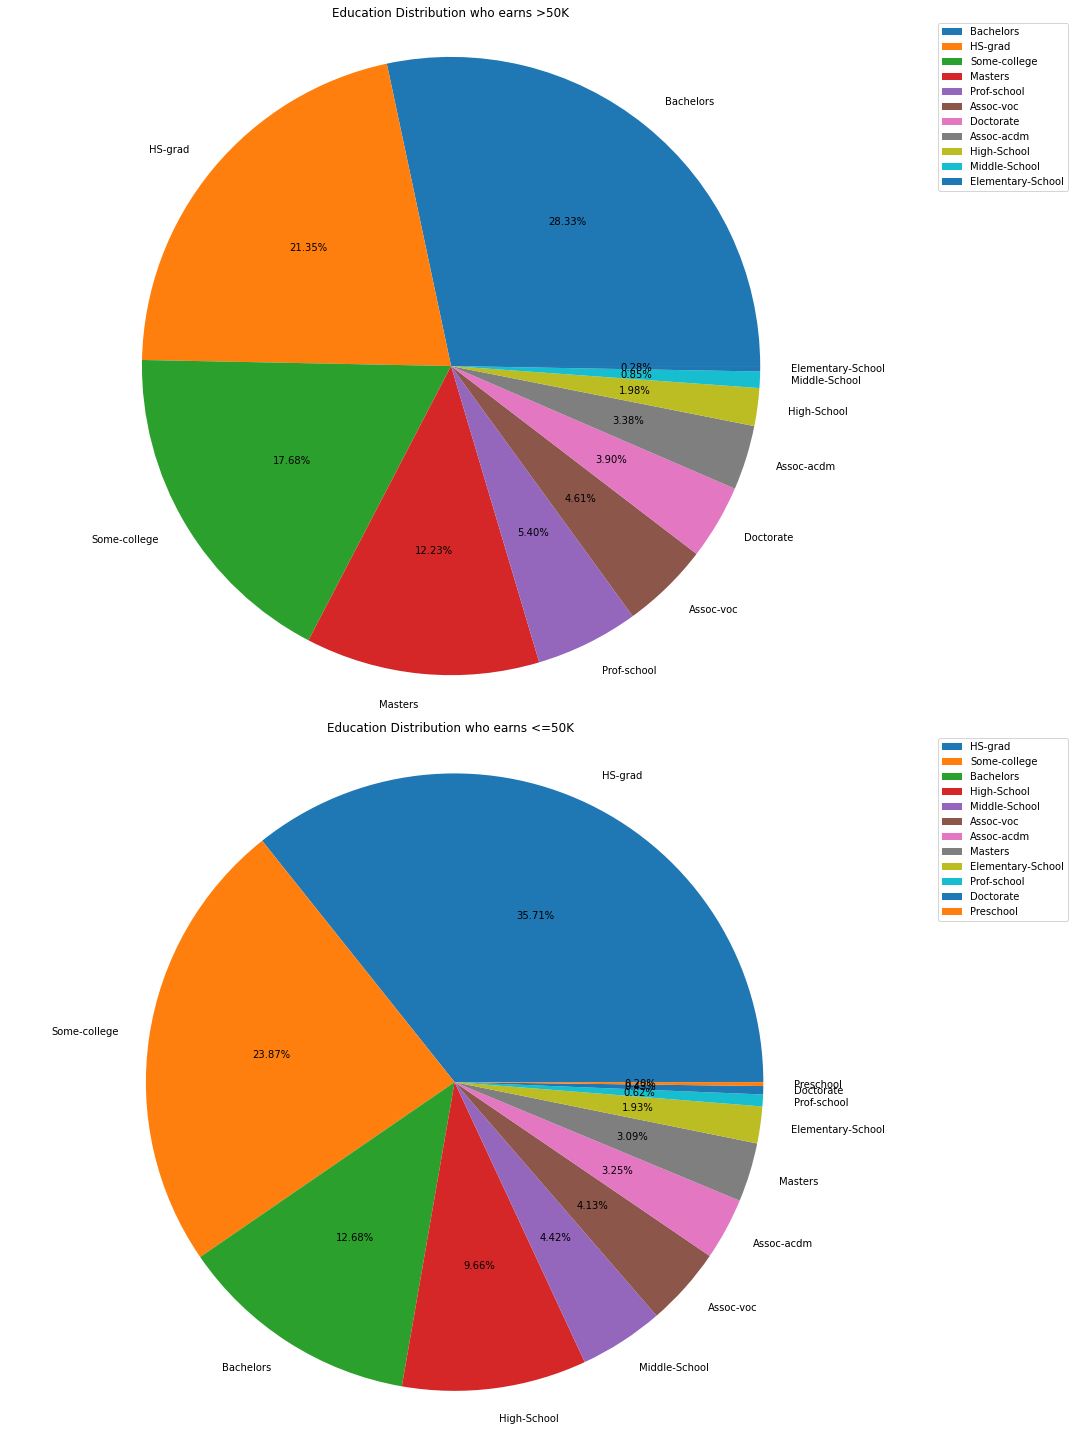

In [14]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,20))

ax1.pie(edu_sum_more_50k, labels = labels_edu_more_50k, autopct='%1.2f%%')
ax1.legend(labels_edu_more_50k, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.axis('equal')
ax1.set_title('Education Distribution who earns >50K')
plt.subplots_adjust(hspace = 0.35)


ax2.set_ylabel("") 
ax2.pie(edu_sum_less_50k, labels = labels_edu_less_50k, autopct='%1.2f%%')
ax2.legend(labels_edu_less_50k, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.axis('equal')
ax2.set_title('Education Distribution who earns <=50K')

plt.tight_layout()
plt.show()

The top 3 level of education whose earnings more than 50K are 'Bachelors', 'HS-grad', and 'Some-college'. So, your level of education doesn't really affect the yearly earnings. But also if you have 'Masters' degree, there is a chance you earn more than 50K.

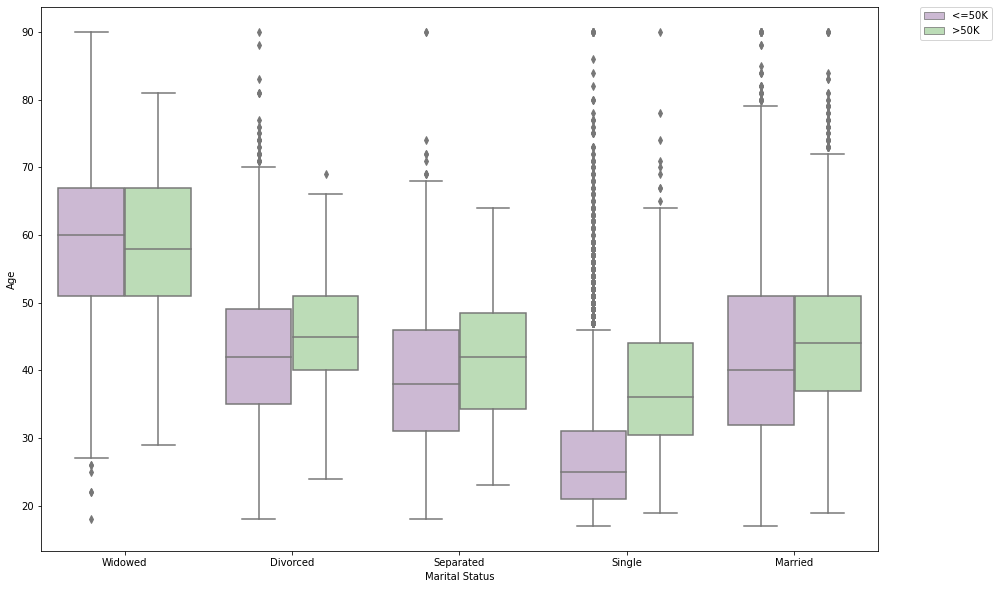

In [15]:
plt.figure(figsize = (15,10))
sns.boxplot(x="Marital Status", y="Age", hue="Income", data=df, 
            palette="PRGn").legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

This boxplot above shows Age Distribution between Marital Status divided by income. People who earn more than 50K per year tend to aged around 40 in all Marital Status. We can not say the same to people who earn less than 50K as its age median for each marital status is distributed, not showing any pattern. Also there are many outlier (extreme value) in Single Marital Status with income less than 50K.

In [16]:
occu_more_50k = df_more_50k['Occupation'].value_counts()
labels_occu_more_50k = list(occu_more_50k.index)
occu_sum_more_50k = list(occu_more_50k)

occu_less_50k = df_less_50k['Occupation'].value_counts()
labels_occu_less_50k = list(occu_less_50k.index)
occu_sum_less_50k = list(occu_less_50k)

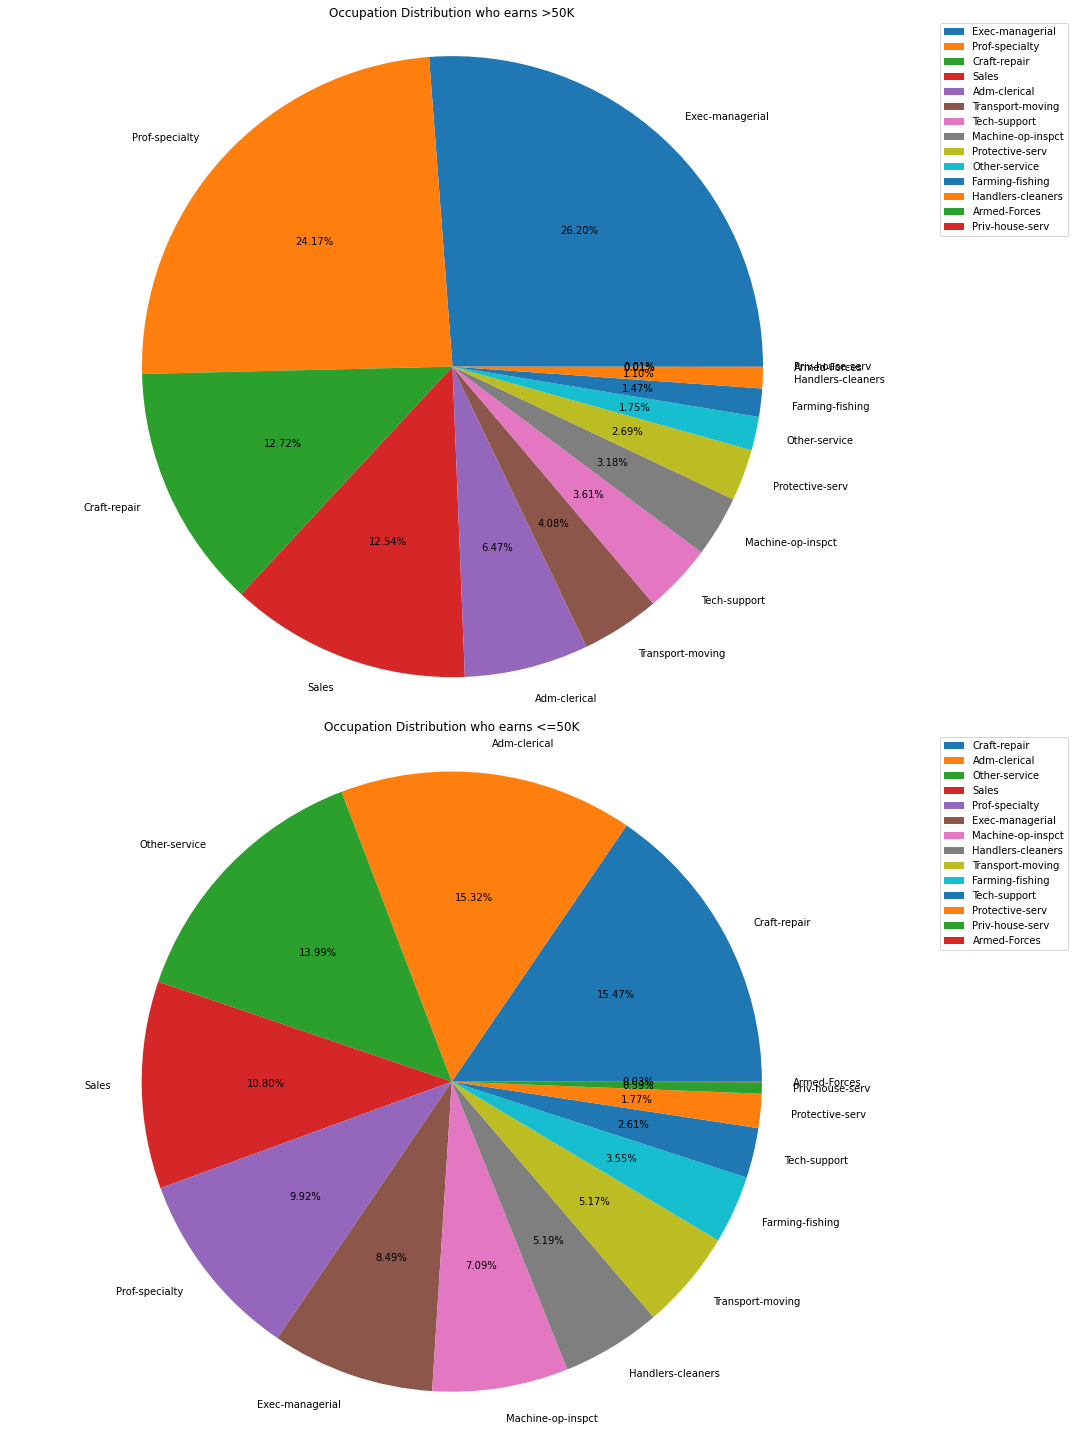

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,20))

ax1.pie(occu_sum_more_50k, labels = labels_occu_more_50k, autopct='%1.2f%%')
ax1.legend(labels_occu_more_50k, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.axis('equal')
ax1.set_title('Occupation Distribution who earns >50K')

ax2.pie(occu_sum_less_50k, labels = labels_occu_less_50k, autopct='%1.2f%%')
ax2.legend(labels_occu_less_50k, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.axis('equal')
ax2.set_title('Occupation Distribution who earns <=50K')

plt.tight_layout()
plt.show()

Cencus participant whose job is 'Exec-managerial' and 'Prof-specialty' tends to earn more than 50k per year. Occupation distribution in people who earn less than 50k per year is more varied as in there is no dominating occupation.

In [18]:
wc_more_50k = df_more_50k['Workclass'].value_counts()
labels_wc_more_50k = list(wc_more_50k.index)
wc_sum_more_50k = list(wc_more_50k)

wc_less_50k = df_less_50k['Workclass'].value_counts()
labels_wc_less_50k = list(wc_less_50k.index)
wc_sum_less_50k = list(wc_less_50k)

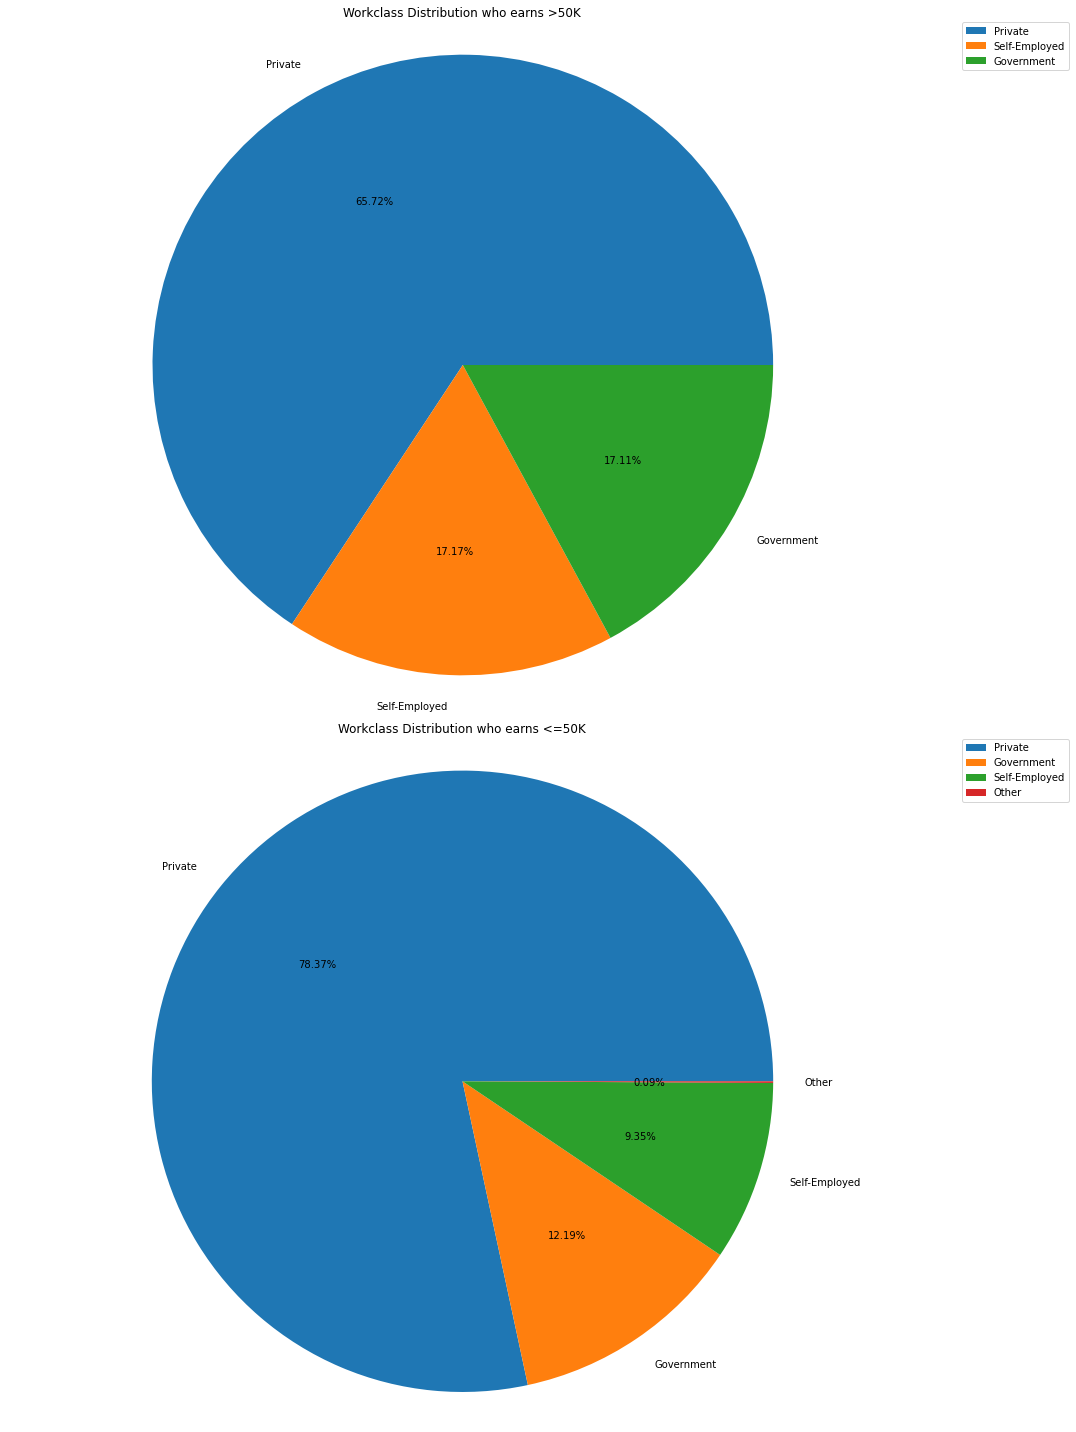

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,20))

ax1.pie(wc_sum_more_50k, labels = labels_wc_more_50k, autopct='%1.2f%%')
ax1.legend(labels_wc_more_50k, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.axis('equal')
ax1.set_title('Workclass Distribution who earns >50K')

ax2.pie(wc_sum_less_50k, labels = labels_wc_less_50k, autopct='%1.2f%%')
ax2.legend(labels_wc_less_50k, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.axis('equal')
ax2.set_title('Workclass Distribution who earns <=50K')

plt.tight_layout()
plt.show()

Most census participant comes from Private workclass or industry, so most likely Private workclass dominates both type of earnings. Also there is no Other Workclass who earns more than 50k per year. It also interesting that there is a higher population of Self Employed workclass that earn more than 50k per year than those who are working in a government sector.

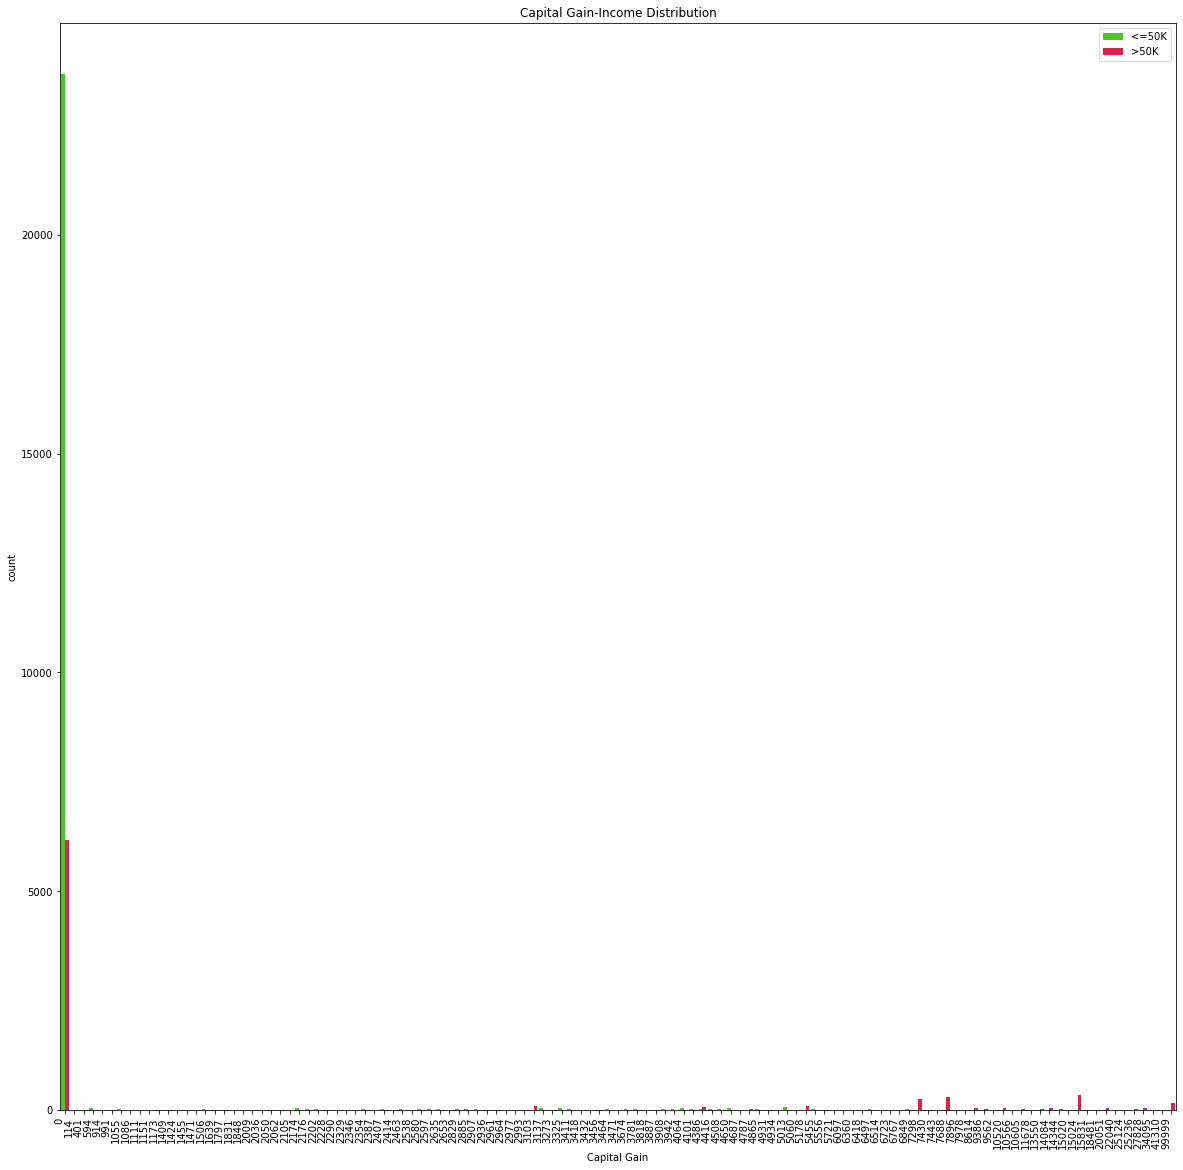

In [20]:
plt.figure(figsize = (20,20))
cptl_gain = sns.countplot(x = df['Capital Gain'], hue = df['Income'], 
                                        palette = 'prism')
cptl_gain.set_xticklabels(cptl_gain.get_xticklabels(), 
                                        horizontalalignment='right', rotation=90)
cptl_gain.legend(loc = 'upper right')
cptl_gain.set_title('Capital Gain-Income Distribution')
plt.show()

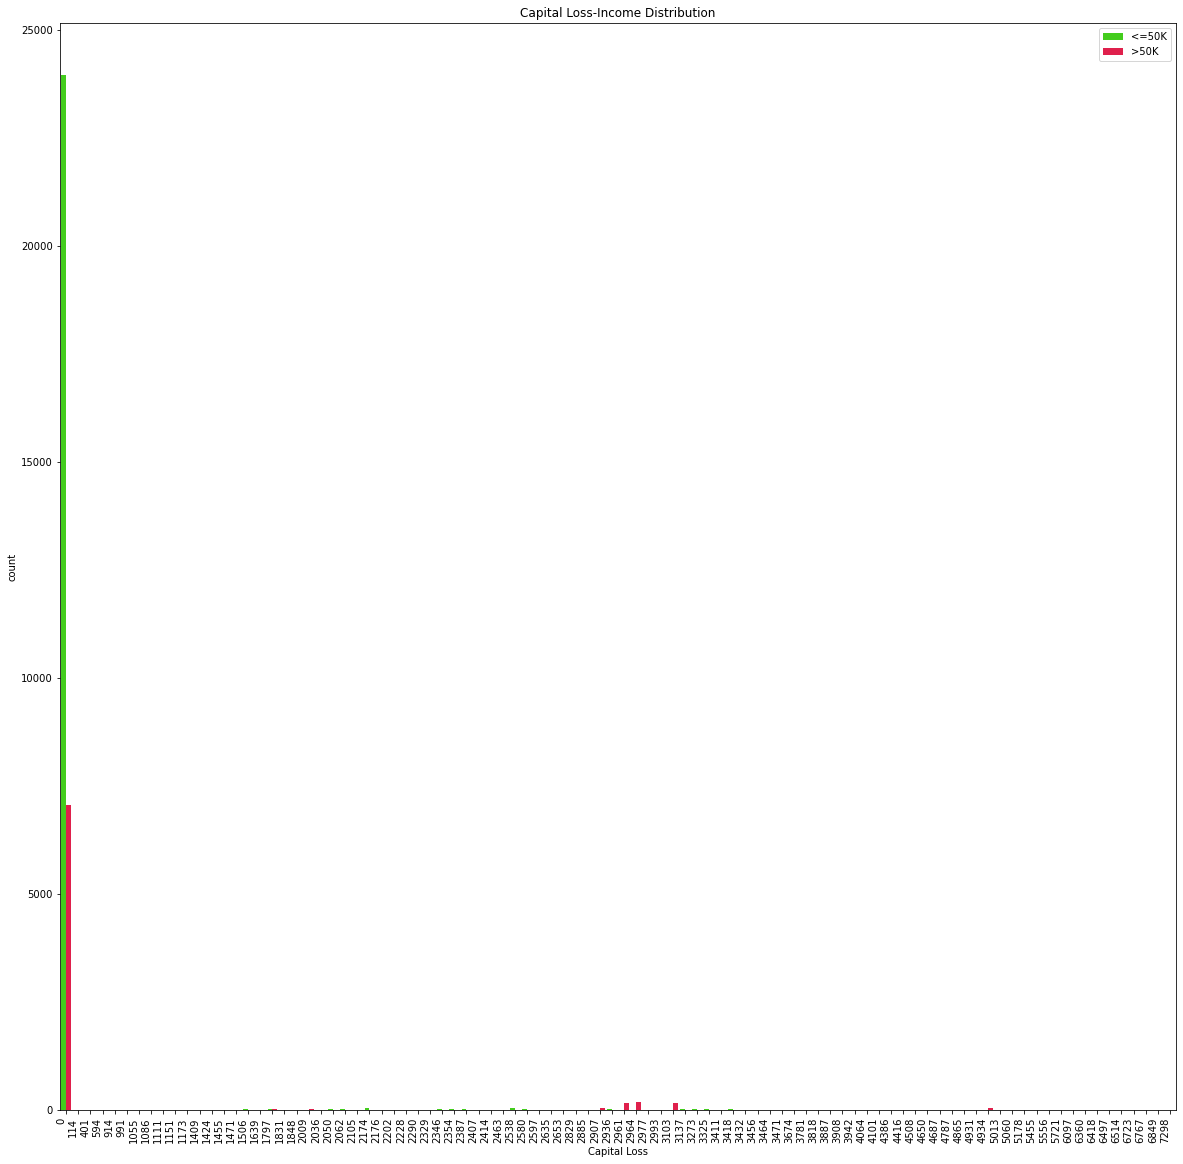

In [21]:
plt.figure(figsize = (20,20))
cptl_loss = sns.countplot(x = df['Capital Loss'], hue = df['Income'], 
                                        palette = 'prism')
cptl_loss.set_xticklabels(cptl_gain.get_xticklabels(), 
                                        horizontalalignment='right', rotation=90)
cptl_loss.legend(loc = 'upper right')
cptl_loss.set_title('Capital Loss-Income Distribution')
plt.show()

Both Capital Gain and Capital Loss' distribution are not really distributed evenly as you can see most observations have zero Capital Gain or Capital Loss. I guess it is wise if I drop these 2 features. Also we drop Final Weight as it is a census indicator and we can not really use it. 

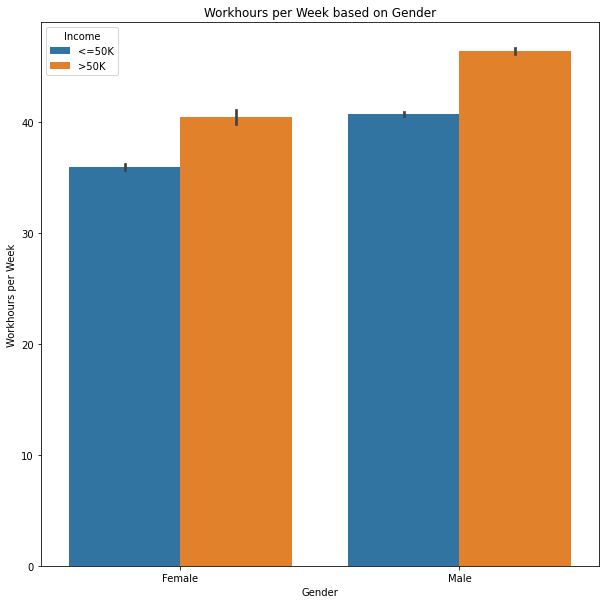

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x = df['Gender'],y = df['Workhours per Week'], hue = df['Income'])
plt.xlabel('Gender')
plt.ylabel('Workhours per Week')
plt.title('Workhours per Week based on Gender')
plt.show()

From barplot above, it shows that Male, on average, works more time per week than female. Also in both gender, it shows that more time you spend in work, you also have a greater chance to earn more than 50K.

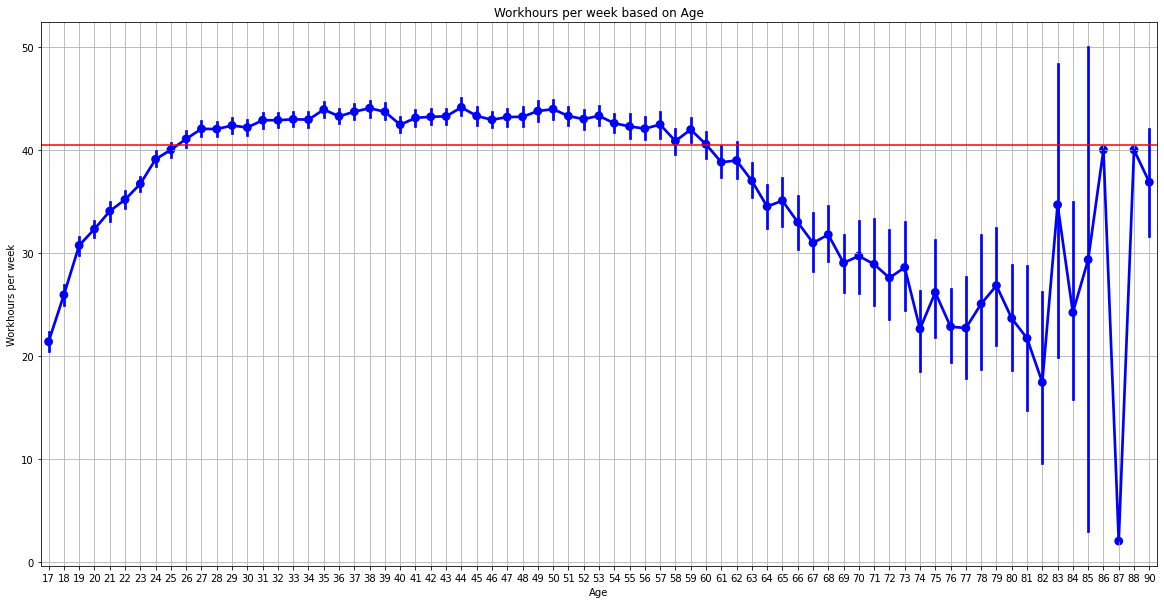

In [23]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x = 'Age',y = 'Workhours per Week', data = df,color='blue',alpha=0.8)
plt.axhline (np.mean(df['Workhours per Week']),color = 'red')
plt.xlabel('Age')
plt.ylabel('Workhours per week')
plt.title('Workhours per week based on Age')
plt.grid()

The redline in graph above shows the mean value of workhours per week, it is around 40.44 hours per week. We can see that people aged 26 - 60 work above average rather than other age point. Also, there is a group of people who work more than average in age group between 83 - 90.

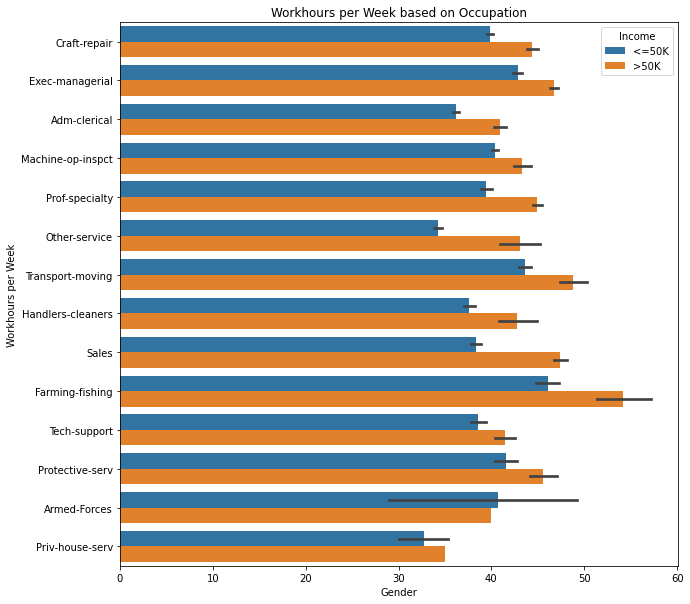

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(y = df['Occupation'],x = df['Workhours per Week'], hue = df['Income'])
plt.xlabel('Gender')
plt.ylabel('Workhours per Week')
plt.title('Workhours per Week based on Occupation')

plt.show()

It shows that almost all kind of occupation with income more than 50K works above average with exception in Armed-Forces and Priv-house-serv.

## Correlation

We mentioned above that we are gonna drop 'Capital Gain', 'Capital Loss', and 'Final Weight'.

In [25]:
df_1 = df.copy()
df_1.drop(['Capital Gain', 'Capital Loss', 'Final Weight'], axis = 1, inplace = True)
df_1.head()

,Age,Workclass,Education,Years of Education,Marital Status,Occupation,Role in Family,Race,Gender,Workhours per Week,Native Country,Income
0,90,Private,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Adm-clerical,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,Middle-School,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 32537 non-null  int64 
 1   Workclass           32537 non-null  object
 2   Education           32537 non-null  object
 3   Years of Education  32537 non-null  int64 
 4   Marital Status      32537 non-null  object
 5   Occupation          32537 non-null  object
 6   Role in Family      32537 non-null  object
 7   Race                32537 non-null  object
 8   Gender              32537 non-null  object
 9   Workhours per Week  32537 non-null  int64 
 10  Native Country      32537 non-null  object
 11  Income              32537 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


### Method 1

In [27]:
#Functions for finding out correlation value

#Correlation measurement untuk data categorical dan continuous
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

#Correlation measurement untuk data categorical dan categorical
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [28]:
cat_feature = df_1.select_dtypes('object').columns
num_feature = df_1.drop(cat_feature, axis = 1).columns
print(len(cat_feature), len(num_feature))
print(cat_feature)
print(num_feature)

9 3
Index(['Workclass', 'Education', 'Marital Status', 'Occupation',
       'Role in Family', 'Race', 'Gender', 'Native Country', 'Income'],
      dtype='object')
Index(['Age', 'Years of Education', 'Workhours per Week'], dtype='object')


For this method, I use a function above (correlation_ratio and cramers_v) to determine correlation value between categorical and continous data also between categorical and categorical data. Because of our target variable is a categorical data we use function above.

In [29]:
list_cat_to_num_corr = []
for j in num_feature:
    list_cat_to_num_corr.append(correlation_ratio(df_1['Income'], df_1[j]))

list_cat_to_cat_corr = []
for k in cat_feature:
    list_cat_to_cat_corr.append(cramers_v(df_1['Income'], df_1[k]))

df_corr1 = pd.DataFrame(list_cat_to_num_corr, index = num_feature, columns = ['Correlation Ratio'])
df_corr1 = df_corr1.append(pd.DataFrame(list_cat_to_cat_corr, index = cat_feature, columns = ['Correlation Ratio']))
df_corr1 = df_corr1.sort_values(ascending = False, by = 'Correlation Ratio')

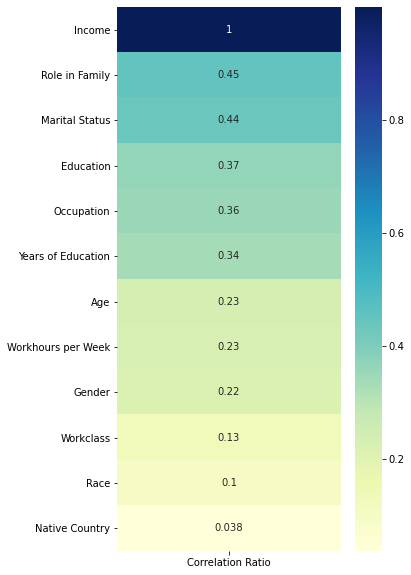

In [30]:
plt.figure(figsize = (5, 10))
sns.heatmap(df_corr1, annot = True, cmap="YlGnBu")
plt.show()

### Metode 2

For this method, we use common method in determining correlation. Bur first we encode the categorical feature in the dataframe.

In [31]:
le = LabelEncoder()
for l in cat_feature: 
    df_1[l] = le.fit_transform(df_1[l])

corr_2 = df_1.corr()
df_corr2 = pd.DataFrame(np.abs(corr_2['Income']).sort_values(ascending = False))
df_corr2.rename(columns = {'Income' : 'Correlation Ratio 2'}, inplace = True)

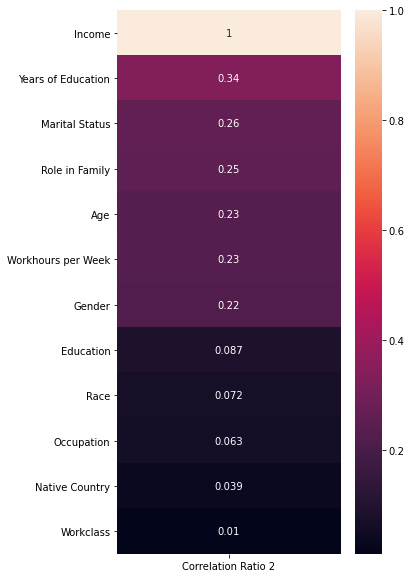

In [32]:
plt.figure(figsize = (5, 10))
sns.heatmap(df_corr2, annot = True)
plt.show()

In [33]:
df_corr_merge = df_corr1.join(df_corr2, how='outer')
df_corr_merge = df_corr_merge.join(pd.DataFrame(df_1.dtypes, columns=['Type']), how = 'outer')
df_corr_merge['Difference'] = np.abs(round(df_corr_merge['Correlation Ratio'] - df_corr_merge['Correlation Ratio 2'], 3))
df_corr_merge

,Correlation Ratio,Correlation Ratio 2,Type,Difference
Age,0.234037,0.234037,int64,0.000
Education,0.368404,0.087201,int32,0.281
Gender,0.215825,0.215969,int32,0.000
Income,0.999916,1.000000,int32,0.000
Marital Status,0.436853,0.260273,int32,0.177
Native Country,0.038174,0.038702,int32,0.001
Occupation,0.356682,0.063031,int32,0.294
Race,0.100243,0.071847,int32,0.028
Role in Family,0.453353,0.250948,int32,0.202
Workclass,0.131363,0.010486,int32,0.121


There is a few differences between Correlation Ratio in Method 1 and Method 2. We can use this dataframe for Feature Selection process further.

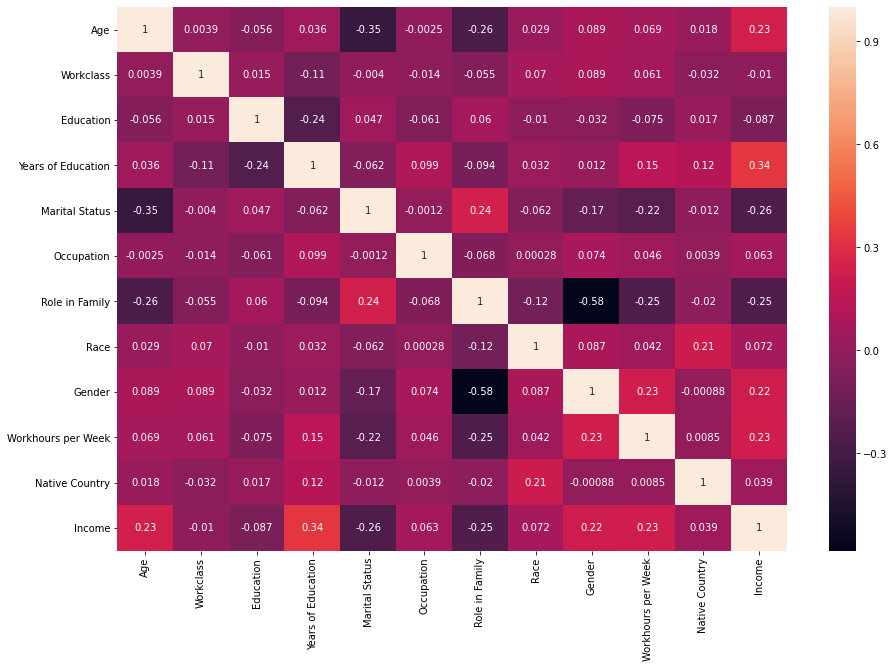

In [34]:
plt.figure(figsize = (15,10))
sns.heatmap(df_1.corr(), annot = True)
plt.show()

By using a common correlation method, it seems that there is no collinearity between each features.

In [35]:
# df_corr_merge.to_csv('df_corr_merge.csv')

In [36]:
# df_1.to_csv('df_1.csv')

In [37]:
# df_desc.to_csv('df_desc.csv')